Maybe we define new structure which captures the input parameters specific to each problem in one place (`scale_factor`).
We need to define a range on `d` that is also function dependent (that we could adjust by hand). 

We need to generate three graphs: 
- Histogram of Number of `loc_min` points were found, (so outputs of the Optim routine) and what percentage of them is within a small distance of a critical point of the approximant. As a function of the degree `d` of the approximant.


In [1]:
include(joinpath(dirname(Base.find_package("Globtim")), "..", ".globtim", "notebook_setup.jl"))

  Activating project at `~/globtim`


activate! (generic function with 1 method)

Can a function export "Optional attributes" like just some constants or its optimal domain of definition? --> works. 

In [2]:
d_min, d_max = 3, 30
TD = 1.0
params = load_function_params("dejong5")
TR = test_input(dejong5;
    dim=params.dim,
    center=params.center,
    GN=params.num_samples,
    sample_range=params.sample_range,
    tolerance=params.tolerance)

@polyvar(x[1:TR.dim]); # Define polynomial ring 

In [3]:
results = analyze_degrees(TR, x, d_min, d_max, step=1, tol_dist=TD)

current L2-norm: 219.01519425890285
Dimension m of the vector space: 10

=== Starting MSolve Parser (dimension: 2) ===
Processed 2 points (0.002s)
Processing point 1 of 1
Optimization has converged within bounds: ✓
current L2-norm: 216.7064632281598
Dimension m of the vector space: 15

=== Starting MSolve Parser (dimension: 2) ===
Processed 1 points (0.0s)
Processing point 1 of 1
Optimization has converged within bounds: ✓
current L2-norm: 216.7061381713188
Dimension m of the vector space: 21

=== Starting MSolve Parser (dimension: 2) ===
Processed 6 points (0.0s)
Processing point 1 of 1
Optimization has converged within bounds: ✓
current L2-norm: 215.36474861005578
Dimension m of the vector space: 28

=== Starting MSolve Parser (dimension: 2) ===
Processed 25 points (0.0s)
Processing point 1 of 13
Optimization has converged within bounds: ✓
Processing point 2 of 13
Optimization has converged within bounds: ✓
Processing point 3 of 13
Optimization has converged within bounds: ✓
Processi

Dict{Int64, @NamedTuple{df::DataFrame, df_min::DataFrame, convergence_stats::NamedTuple, discrete_l2::Float64}} with 28 entries:
  5  => @NamedTuple{df::DataFrame, df_min::DataFrame, convergence_stats::NamedT…
  16 => @NamedTuple{df::DataFrame, df_min::DataFrame, convergence_stats::NamedT…
  20 => @NamedTuple{df::DataFrame, df_min::DataFrame, convergence_stats::NamedT…
  12 => @NamedTuple{df::DataFrame, df_min::DataFrame, convergence_stats::NamedT…
  24 => @NamedTuple{df::DataFrame, df_min::DataFrame, convergence_stats::NamedT…
  28 => @NamedTuple{df::DataFrame, df_min::DataFrame, convergence_stats::NamedT…
  8  => @NamedTuple{df::DataFrame, df_min::DataFrame, convergence_stats::NamedT…
  17 => @NamedTuple{df::DataFrame, df_min::DataFrame, convergence_stats::NamedT…
  30 => @NamedTuple{df::DataFrame, df_min::DataFrame, convergence_stats::NamedT…
  23 => @NamedTuple{df::DataFrame, df_min::DataFrame, convergence_stats::NamedT…
  19 => @NamedTuple{df::DataFrame, df_min::DataFrame, converg

In [ ]:
fig_1 = plot_discrete_l2(results, d_min, d_max, 1)
# Commented out save command
# save("discrete_l2.pdf", fig_1)
display(fig_1)

In [ ]:
fig_2 = capture_histogram(results, d_min, d_max, 1, show_legend=false)
# Commented out save command
# save("histogram.pdf", fig_2)
display(fig_2)

In [ ]:
fig_3 = plot_convergence_analysis(results, d_min, d_max, 1)
# Commented out save command
# save("convergence_analysis.pdf", fig_3)
display(fig_3)

In [23]:
RT = results[20]
df_t = RT.df
df_m = RT.df_min;
sort!(df_t, :z)
df_m_captured = df_m[df_m.captured.==1, :]

Row,x2,x1,value,captured
,Float64,Float64,Float64,Bool
1,-31.9587,31.9587,4.95049,true
2,-31.9797,-31.9799,0.998004,true
3,15.9619,31.9253,19.2307,true
4,31.9264,-31.9264,20.1535,true
5,-15.9719,15.9723,8.84084,true
6,31.9211,31.9211,23.8094,true
7,31.9224,-15.9602,21.0727,true
8,-31.9608,15.9816,3.96825,true
9,-31.9651,-0.0141013,2.98211,true


In [24]:
pol_cheb = Constructor(TR, 8, basis=:chebyshev)
inside_mask = points_in_hypercube(df_t, TR)
values_mask = points_in_range(df_t, TR, 24.0)
df_minimizers = df_t[values_mask.&inside_mask, :] # has both `x` (raw) and `y` (optimized)

current L2-norm: 213.5407398840226


Row,x1,x2,z,y1,y2,close,steps,converged
,Float64,Float64,Float64,Float64,Float64,Bool,Float64,Bool
1,-31.9102,-31.9067,0.998005,-31.9781,-31.9787,true,12.0,true
2,-16.1882,-32.0915,1.99208,-16.0112,-31.9703,true,12.0,true
3,0.00135976,-32.1581,2.98212,0.00135984,-31.9651,true,6.0,true
4,16.1901,-32.0898,3.9683,16.0112,-31.9609,true,9.0,true
5,31.9084,-31.9031,4.95049,31.9587,-31.9587,true,9.0,true
6,-32.094,-16.1846,5.92888,-31.9539,-15.9787,true,15.0,true
7,-16.4322,-16.4249,6.9154,-15.9759,-15.9754,true,10.0,true
8,0.00281694,-16.5302,7.89552,0.00289596,-15.9736,true,6.0,true
9,16.4358,-16.425,8.85313,15.9724,-15.9724,true,9.0,true


In [ ]:
fig_4 = cairo_plot_polyapprox_levelset(pol_cheb, TR, df_t, df_m_captured, show_captured=true)
# fig_1_p = cairo_plot_polyapprox_levelset(pol_cheb, TR, df_minimizers, df_m, show_captured=false)
# Commented out save command
# save("polyapprox_levelset_min_captured.pdf", fig_4)

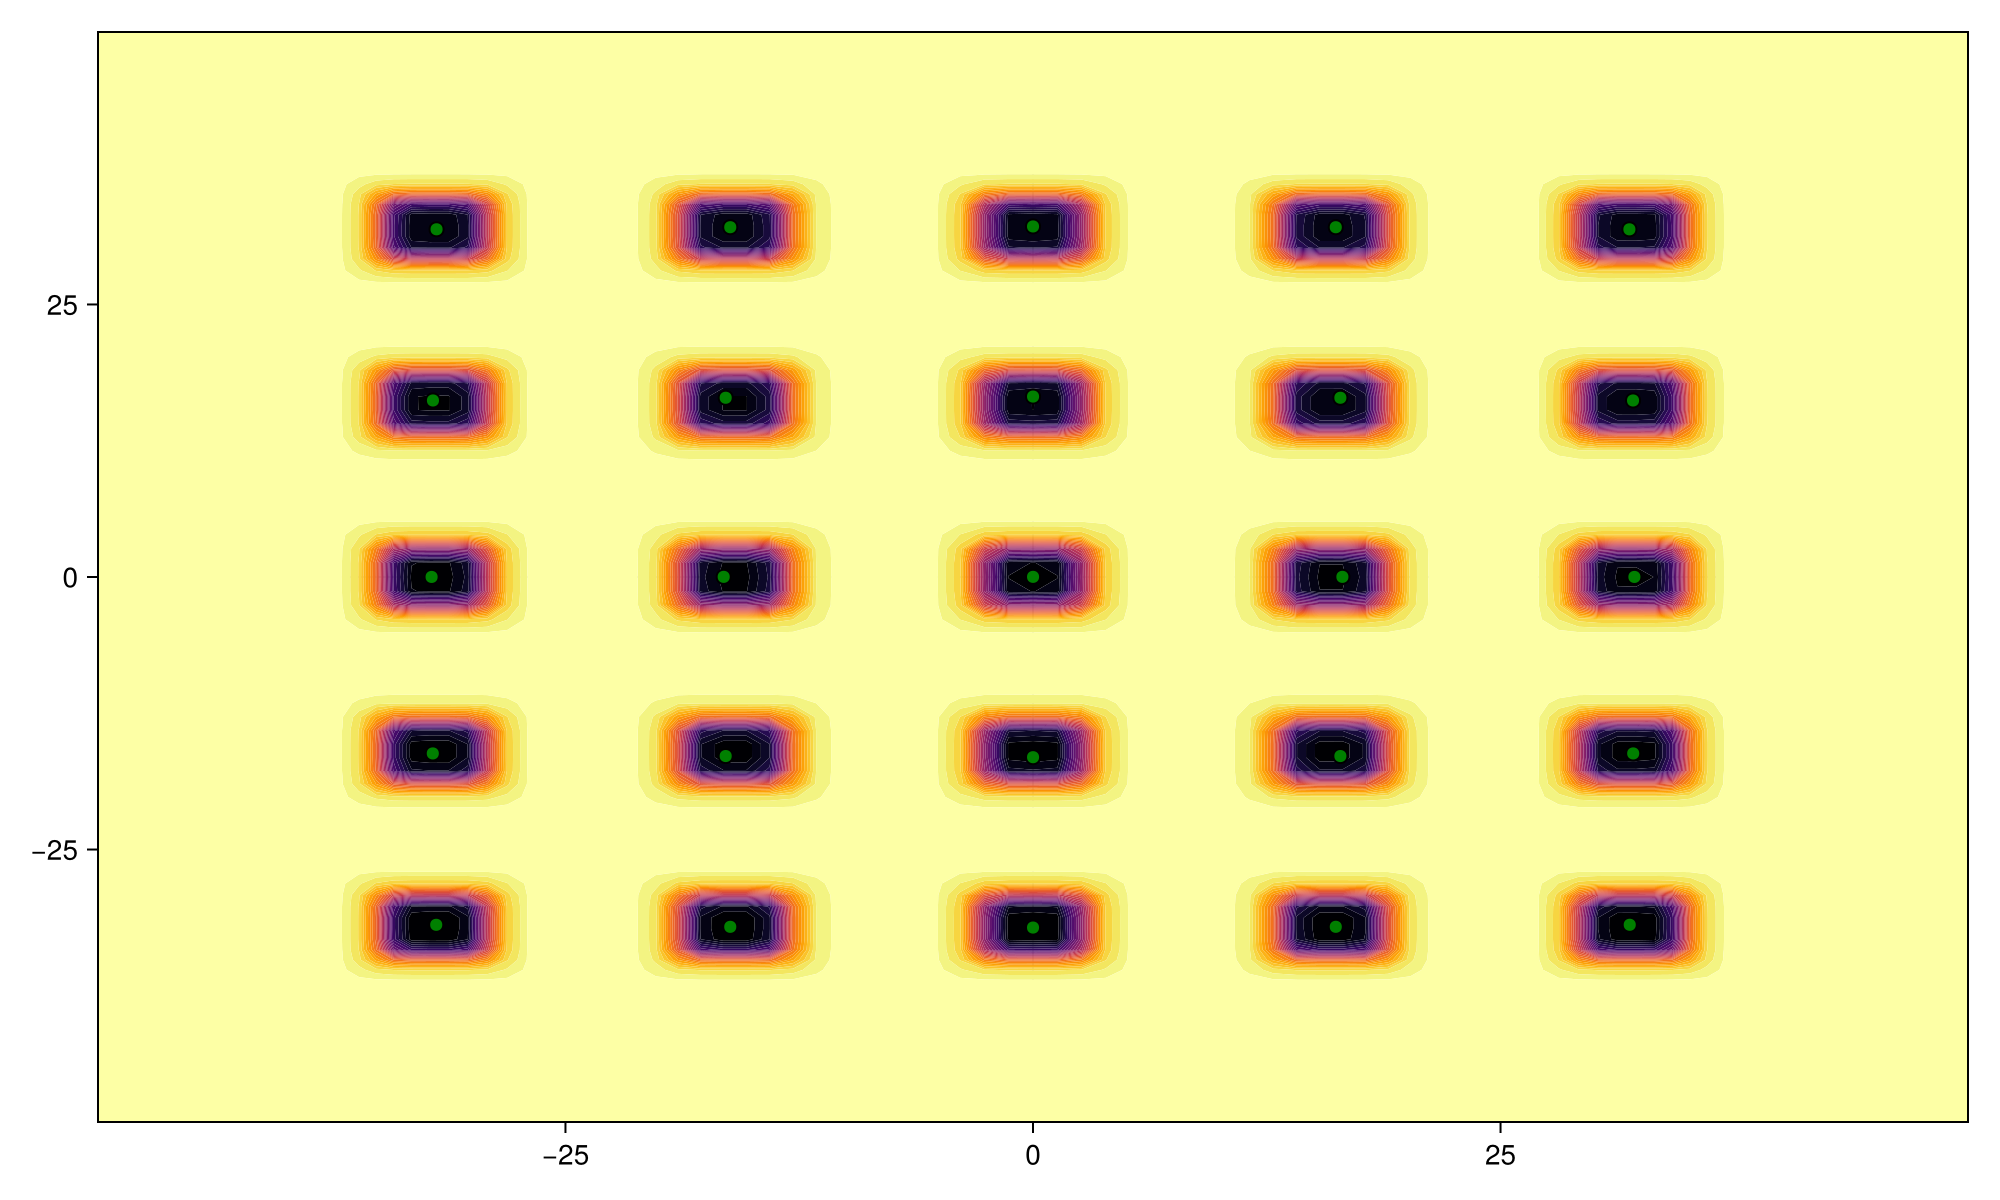

In [28]:
fig_4 = cairo_plot_polyapprox_levelset(pol_cheb, TR, df_minimizers, df_m_captured, show_captured=false)

In [11]:
stats = analyze_converged_points(df_t, TR, results, d_min, d_max, 1)

Dict{String, Any} with 10 entries:
  "overall_max"    => 46.2422
  "avg_distances"  => [33.4188, 33.4192, 33.4329, 10.9639, 10.9501, 7.36393, 7.…
  "n_converged"    => 287
  "degrees"        => [3, 4, 5, 6, 7, 8, 9, 10, 11, 12  …  21, 22, 23, 24, 25, …
  "min_distances"  => [0.687702, 0.708009, 1.28001, 0.331303, 0.114897, 0.32028…
  "n_total_points" => 287
  "overall_avg"    => 5.92875
  "overall_min"    => 0.00134315
  "max_distances"  => [45.7448, 45.7619, 46.2422, 16.7434, 16.8721, 11.8277, 11…
  "n_valid"        => 287

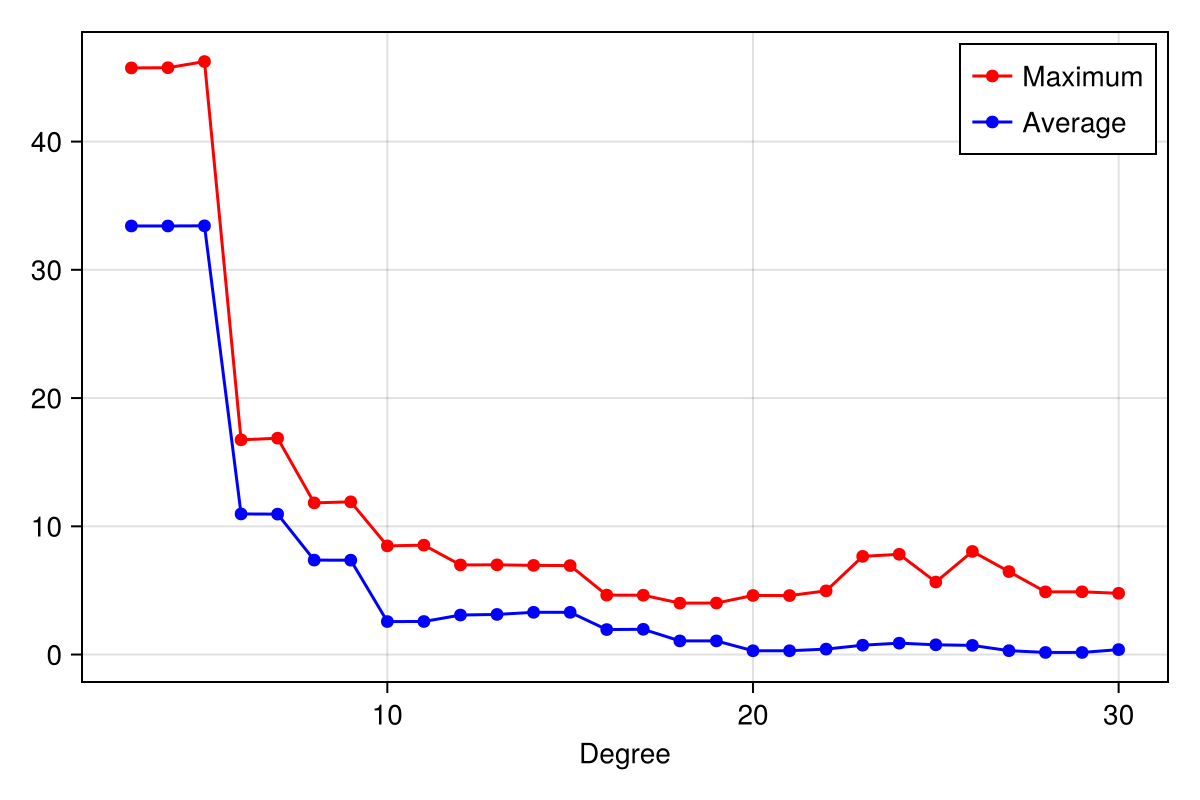

In [12]:
fig_5 = plot_distance_statistics(stats)


In [32]:
stats_2 = analyze_converged_points(df_minimizers, TR, results, d_min, d_max, 1)

Dict{String, Any} with 10 entries:
  "overall_max"    => 46.2422
  "avg_distances"  => [29.9702, 29.9713, 30.0045, 9.95422, 9.94539, 7.90923, 7.…
  "n_converged"    => 25
  "degrees"        => [3, 4, 5, 6, 7, 8, 9, 10, 11, 12  …  21, 22, 23, 24, 25, …
  "min_distances"  => [0.749441, 0.769763, 1.34193, 0.33497, 0.117229, 0.32393,…
  "n_total_points" => 25
  "overall_avg"    => 5.51193
  "overall_min"    => 0.00135356
  "max_distances"  => [45.7448, 45.7618, 46.2422, 14.6934, 14.7749, 11.8273, 11…
  "n_valid"        => 25

Here we had to eliminate the outputs of the Optim routine that were not successful, and the points coming from the approximant. Just because the Optim routine has converged somewhere does not mean it is a good starting point. 

In [ ]:
fig_6 = plot_distance_statistics(stats_2)
# Commented out save command
# save("distance_to_minimizers.pdf", fig_6)